# Estadística descriptiva con Python

#### Vamos a leer un conjunto de datos

In [3]:
import pandas as pd

In [4]:
iris = pd.read_csv('iris_data.txt', sep=",")

Cabecera de la tabla para hacernos una idea de cómo es:

In [6]:
#Muestra los 'n' primeros registros, yo he puesto 10 y también la cabecera
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Tipos de datos en Python:
    

In [8]:
#Tipos de datos que utiliza, porque es importante ver que tipo de datos se tiene al principio
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Más información acerca de mi tabla:

In [10]:
#Nos da más información, número de filas y número de columnas
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Tabla de frecuencias:

Vamos a generarla para la variable petal_width

Vemos antes de nada cómo es esta variable:

In [12]:
#Vemos el diagrama de frecuencias de una variable con sus quartiles
iris['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [13]:
#Para todas las variables en vez de una columna en particular
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Esta variable la vamos a categorizar convirtiéndola en una con tres categorías:
    - que el valor sea <=1
    - que el valor esté entre 1 y 2
    - que el valor sea >= 2
sabiendo que el mínimo es 1 y el máximo 2.5.

In [14]:
#Quiero 'tramificar, sabiendo que el mínimo es 0.3 y el máximo es 2.5 hago esas condiciones'
#Se añaden siemre al final
iris['nueva_variable'] = 'sin categoria'
iris.loc[(iris.petal_width<=1),'nueva_variable'] = '1. <= 1' 
iris.loc[(iris.petal_width>1) & (iris.petal_width<2),'nueva_variable'] = '2. 1-2' 
iris.loc[(iris.petal_width>=2),'nueva_variable'] = '3. >= 2' 

Vemos cómo queda ahora el dataframe con la nueva variable:

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable
0,5.1,3.5,1.4,0.2,setosa,1. <= 1
1,4.9,3.0,1.4,0.2,setosa,1. <= 1
2,4.7,3.2,1.3,0.2,setosa,1. <= 1
3,4.6,3.1,1.5,0.2,setosa,1. <= 1
4,5.0,3.6,1.4,0.2,setosa,1. <= 1


Ahora voy a crear la tabla de frecuencias. 
En particular, calculo las frecuencias absolutas:

In [56]:
#Tabla de conteos
frecuencias = pd.crosstab(index=iris["nueva_variable"],columns="frec_abs")

#Otra forma de sacar los resultados

#frecuencias = iris.groupby("nueva_variable").size().reset_index(name='frec_abs')
#frecuencias = pd.value_counts(iris['nueva_variable'])

print(frecuencias)

col_0           frec_abs
nueva_variable          
1. <= 1               57
2. 1-2                64
3. >= 2               29


Añado las frecuencias relativas:

In [49]:
#Frecuencias relativas
frecuencias["frec_rel"] = iris["nueva_variable"].value_counts() / len(iris["nueva_variable"])
print(frecuencias)

col_0           frec_abs  frec_rel   frec_por
nueva_variable                               
1. <= 1               57  0.380000  38.000000
2. 1-2                64  0.426667  42.666667
3. >= 2               29  0.193333  19.333333


Añado las frecuencias porcentuales:

In [50]:
#Frecuencias porcentuales
frecuencias["frec_por"] = 100* frecuencias["frec_rel"]
print(frecuencias)

col_0           frec_abs  frec_rel   frec_por
nueva_variable                               
1. <= 1               57  0.380000  38.000000
2. 1-2                64  0.426667  42.666667
3. >= 2               29  0.193333  19.333333


In [52]:
#La función cumsum, lo que hace es sumas las frecuencias acumuladas

frecuencias_acum = frecuencias[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum)
#Esto sería haciendo también el acumulado de frec_por
#frecuencias_acum = frecuencias.cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum", "frec_por":"frec_por_acum"})

col_0           frec_abs_acum  frec_rel_acum
nueva_variable                              
1. <= 1                  57.0       0.380000
2. 1-2                  121.0       0.806667
3. >= 2                 150.0       1.000000


In [53]:
#La clave es poner 1 columna, 0 es por fila
tabla_frecuencias = pd.concat([frecuencias, frecuencias_acum], axis=1)
print(tabla_frecuencias)

col_0           frec_abs  frec_rel   frec_por  frec_abs_acum  frec_rel_acum
nueva_variable                                                             
1. <= 1               57  0.380000  38.000000           57.0       0.380000
2. 1-2                64  0.426667  42.666667          121.0       0.806667
3. >= 2               29  0.193333  19.333333          150.0       1.000000


### $\color{red}{\text{Ejercicio 1: Calcular las tablas de frecuencias para el resto de variables del dataframe.}}$

In [38]:
#Primero ver como es la variable, como hemos hecho antes
iris['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [59]:
#Ahora tramificamos
#Se añaden siemre al final
iris['variable_ejercicio'] = 'sin categoria'
iris.loc[(iris.sepal_length<=5),'variable_ejercicio'] = '1. <= 5' 
iris.loc[(iris.sepal_length>5) & (iris.sepal_length<7),'variable_ejercicio'] = '2. 5-7' 
iris.loc[(iris.sepal_length>=7),'variable_ejercicio'] = '3. >= 7' 

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable,variable_ejercicio
0,5.1,3.5,1.4,0.2,setosa,1. <= 1,2. 5-7
1,4.9,3.0,1.4,0.2,setosa,1. <= 1,1. <= 5
2,4.7,3.2,1.3,0.2,setosa,1. <= 1,1. <= 5
3,4.6,3.1,1.5,0.2,setosa,1. <= 1,1. <= 5
4,5.0,3.6,1.4,0.2,setosa,1. <= 1,1. <= 5


In [60]:
#Tabla de conteos
frecuencias_ejercicio = pd.crosstab(index=iris["variable_ejercicio"],columns="frec_abs")
print(frecuencias_ejercicio)

col_0               frec_abs
variable_ejercicio          
1. <= 5                   32
2. 5-7                   105
3. >= 7                   13


In [61]:
#Frecuencias relativas
frecuencias_ejercicio["frec_rel"] = iris["variable_ejercicio"].value_counts() / len(iris["variable_ejercicio"])
print(frecuencias_ejercicio)


col_0               frec_abs  frec_rel
variable_ejercicio                    
1. <= 5                   32  0.213333
2. 5-7                   105  0.700000
3. >= 7                   13  0.086667


In [63]:
#Frecuencias porcentuales
frecuencias_ejercicio["frec_por"] = 100* frecuencias_ejercicio["frec_rel"]
print(frecuencias_ejercicio)

col_0               frec_abs  frec_rel   frec_por
variable_ejercicio                               
1. <= 5                   32  0.213333  21.333333
2. 5-7                   105  0.700000  70.000000
3. >= 7                   13  0.086667   8.666667


In [64]:
#La función cumsum, lo que hace es sumas las frecuencias acumuladas

frecuencias_acum_ejercicio = frecuencias_ejercicio[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum_ejercicio)

col_0               frec_abs_acum  frec_rel_acum
variable_ejercicio                              
1. <= 5                      32.0       0.213333
2. 5-7                      137.0       0.913333
3. >= 7                     150.0       1.000000


In [65]:
#La clave es poner 1 columna, 0 es por fila
tabla_frecuencias_ejercicio = pd.concat([frecuencias_ejercicio, frecuencias_acum_ejercicio], axis=1)
print(tabla_frecuencias_ejercicio)

col_0               frec_abs  frec_rel   frec_por  frec_abs_acum  \
variable_ejercicio                                                 
1. <= 5                   32  0.213333  21.333333           32.0   
2. 5-7                   105  0.700000  70.000000          137.0   
3. >= 7                   13  0.086667   8.666667          150.0   

col_0               frec_rel_acum  
variable_ejercicio                 
1. <= 5                  0.213333  
2. 5-7                   0.913333  
3. >= 7                  1.000000  


### $\color{red}{\text{Ejercicio 2: Calcular frecuencias absolutas y relativas combinadas de dos variables.}}$

In [ ]:
#Hacer... ¿?

In [ ]:
##consultar vbles declaradas
#dir()
#
##borrar
#%reset -f
#del(vble)

### Medidas de posición centrales:

Vamos a calcular la media y la mediana de la variable "sepal_length" y la moda de la variable "species"

In [66]:
#Esto calcula la media
iris[["sepal_length"]].mean()

sepal_length    5.843333
dtype: float64

In [68]:
#Esto calcula la mediana
iris[["sepal_length"]].median()

sepal_length    5.8
dtype: float64

Parece que los valores de la media y la mediana son muy próximos.

In [67]:
#Esto calcula la moda
iris[["species"]].mode()

,species
0,setosa
1,versicolor
2,virginica


¿Qué está pasando?

Vamos a sacarnos una tabla con el número de registros de cada clase para ver por qué no me está sacando el que más se repite:

In [69]:
#ES una variable trimodal, porque los 3 
pd.value_counts(iris['species'])

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Es una variable trimodal (tiene 3 modas)

Veamos cuál es la moda de la variable que creamos para categorizar nuestra vble original "petal_width"

In [70]:
#El valor 1-2 es el que más se repite
iris[["nueva_variable"]].mode()

,nueva_variable
0,2. 1-2


Esta variable sí que tiene una única moda.

### Medidas de posición no centrales:

Veamos los cuartiles:

In [71]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Donde: 
- cuartil 1 se corresponde con el 25%, 
- cuartil 2 con el 50%, que a su vez es la mediana, 
- cuartil 3 con el 75% y 
- cuartil 4 con el max

Vemos por tanto que de esta forma, además de los cuartiles, también obtenemos la media (mean) y la mediana (50%) de forma directa.

Calculemos los percentiles:

In [74]:
iris.quantile(0.50)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

### $\color{red}{\text{Ejercicio 3: Calcular el Rango Intercuartílico de cada variable.}}$

In [77]:
ri_sepal_length=iris["sepal_length"].quantile(0.75) - iris["sepal_length"].quantile(0.25)
ri_sepal_width=iris["sepal_width"].quantile(0.75) - iris["sepal_width"].quantile(0.25)
ri_petal_length=iris["petal_length"].quantile(0.75) - iris["petal_length"].quantile(0.25)
ri_petal_width=iris["petal_width"].quantile(0.75) - iris["petal_width"].quantile(0.25)

print("Rango Intercualtil de sepal_length",ri_sepal_length)
print("Rango Intercualtil de sepal_width",ri_sepal_width)
print("Rango Intercualtil de petal_length",ri_petal_length)
print("Rango Intercualtil de petal_width",ri_petal_width)


Rango Intercualtil de sepal_length 1.3000000000000007
Rango Intercualtil de sepal_width 0.5
Rango Intercualtil de petal_length 3.4999999999999996
Rango Intercualtil de petal_width 1.5


### Medidas de dispersión:

Calculamos el rango de la variable 'sepal_length':

In [78]:
#Rango según las slides
iris[['sepal_length']].max() - iris[['sepal_length']].min()

sepal_length    3.6
dtype: float64

Calculamos la varianza de la variable 'sepal_length':

In [79]:
iris[['sepal_length']].var()

sepal_length    0.685694
dtype: float64

Calculamos la desviación típica de la variable 'sepal_length':

In [80]:
iris[['sepal_length']].std()

sepal_length    0.828066
dtype: float64

Podemos además representar las variables gráficamente utilizando un boxplot, para tener una visión de cómo de dispersas están nuestras variables.

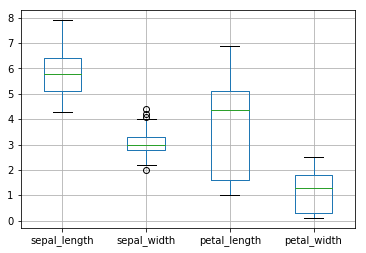

In [83]:
boxplot = iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### $\color{red}{\text{Ejercicio 4: Calcular rango, varianza y desviación típica de cada variable.}}$

In [90]:
#Dispersión de la primera columna
dispersion_sepal_lengh=[0,0,0]
dispersion_sepal_lengh[0]=iris[['sepal_length']].max() - iris[['sepal_length']].min()
dispersion_sepal_lengh[1]=iris[['sepal_length']].var()
dispersion_sepal_lengh[2]=iris[['sepal_length']].std()





### $\color{red}{\text{Ejercicio 5: Calcular el coeficiente de variación de Pearson de cada variable para concluir cuál es la que presenta menor variación con respecto a las demás.}}$

### Medidas de forma:

Vamos a calcular el coeficiente de asimetría de cada una de las variables mediante la función 'skew':

In [91]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

Vamos a calcular la curtosis de cada variable con el método .kurt(). 
<br>Este método resta 3 automáticamente, de manera que la comparación la hacemos con 0 o le podemos sumar 3 y comparar como habíamos especificado antes con 3.

In [92]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

### $\color{red}{\text{Ejercicio 6: Representar gráficamente las distribuciones de estas variables marcando dónde están su media y su mediana.}}$

### Correlación entre variables:

In [93]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Representemos visualmente la correlación existente entre sepal_length y sepal_width con un gráfico de dispersión.
<br> Para ello vamos a cargar la libreria matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

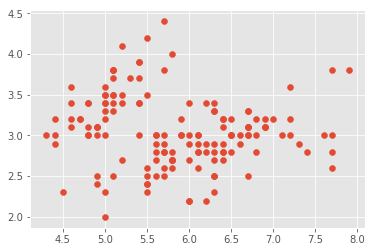

In [5]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

Ni a través del coeficiente ni gráficamente se aprecia relación entre estas dos variables. 
<br> Intentemos representarlo de nuevo pero distinguiendo según la especie.

In [7]:
# Creamos el vector de colores, para que, en función de la vble class pinte los puntos de un color u otro
colores = {"setosa":"RoyalBlue", "versicolor":"Crimson","virginica":"DarkGreen"}
class_colores = iris['species'].map(colores)

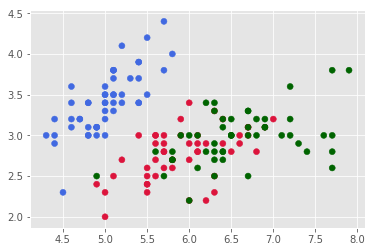

In [8]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, color=class_colores)
plt.show()

Vamos a añadirle la leyenda para saber de qué especie o clase estamos hablando en cada caso:

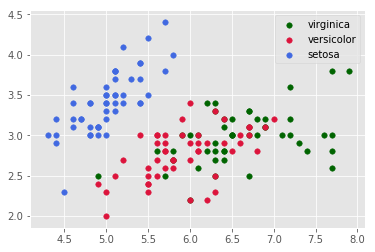

In [9]:
fig, ax = plt.subplots()
for species in set(iris['species']):
    ax.scatter(
        iris.sepal_length[iris.species == species],
        iris.sepal_width[iris.species == species],
        s = 30,
        c = colores[species],
        label = species)
plt.legend()
plt.show()

In [10]:
iris[iris.species == "setosa"].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000
